In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from datetime import datetime

In [22]:
train = pd.read_csv('../assets/train.csv')
test = pd.read_csv('../assets/test.csv')
weather = pd.read_csv('../assets/weather.csv')

In [10]:
spray = pd.read_csv('../assets/spray.csv')

spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [8]:
spray.shape


(14835, 4)

In [9]:
spray.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [11]:
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [ ]:
#the only nulls are in Time

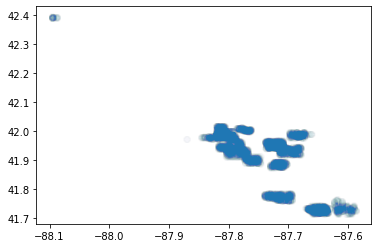

In [12]:
#Visualize the geospacial data
plt.scatter(data=spray,x='Longitude', y='Latitude', alpha = 0.009)

In [15]:
train.shape

(10506, 12)

In [16]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [18]:
train.isnull().sum()

#no null values in the train set

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [23]:
#check proportion of how many West Nile Virus-infected mosquitos
train['WnvPresent'].value_counts(normalize=True)


0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

In [ ]:
#outstanding majority of them have the virus! 94.76%. 

In [24]:
#checking out all the mosquito species
train['Species'].value_counts(normalize=True)

CULEX PIPIENS/RESTUANS    0.452313
CULEX RESTUANS            0.260803
CULEX PIPIENS             0.256901
CULEX TERRITANS           0.021131
CULEX SALINARIUS          0.008186
CULEX TARSALIS            0.000571
CULEX ERRATICUS           0.000095
Name: Species, dtype: float64

In [25]:
#most species are from Culex Pipiens (45%), followed by Restuans (26%) and Pipiens (25%)

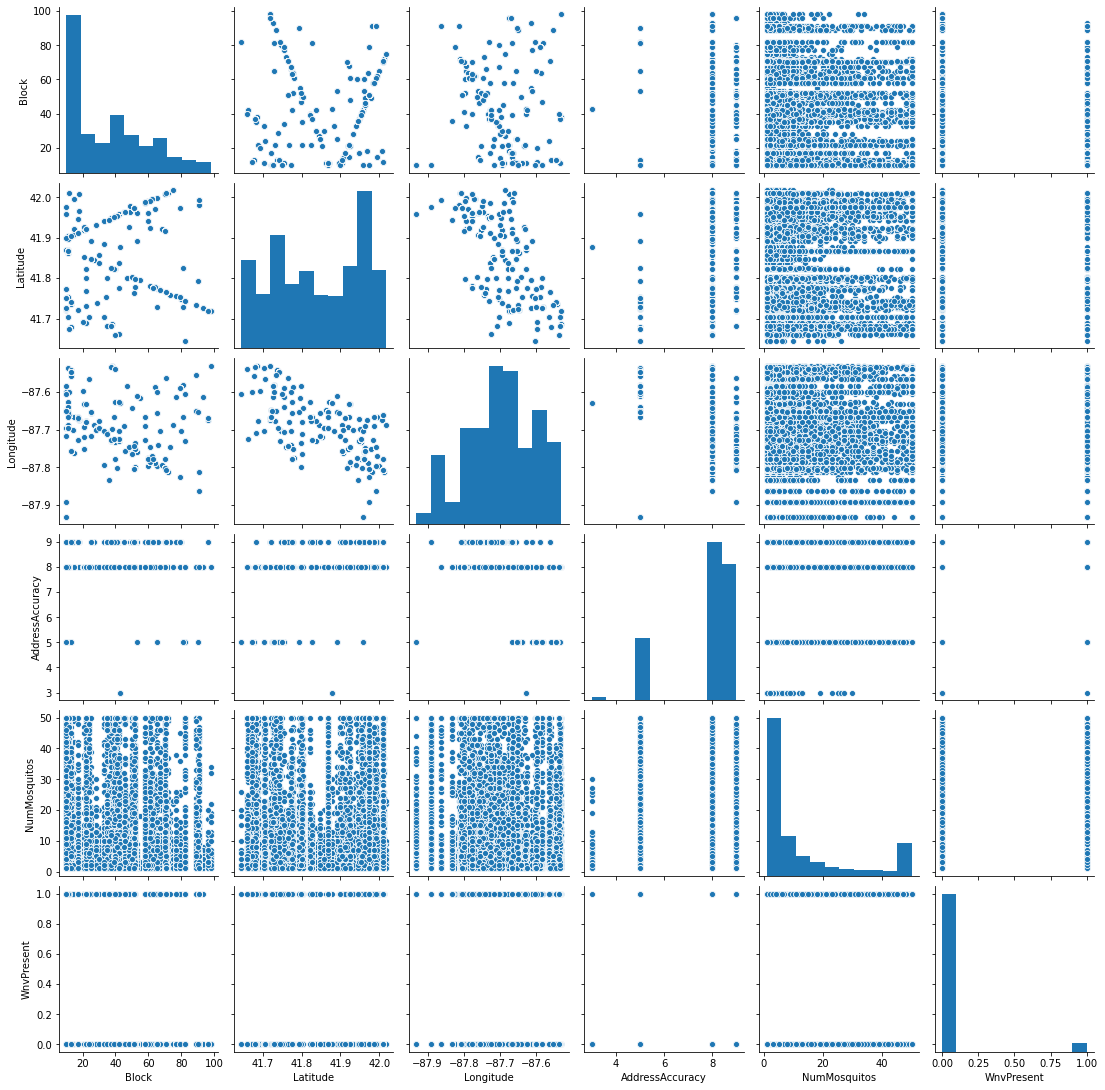

In [30]:
sns.pairplot(train);

#checking out pairplots of the numerical features and it's not very helpful seeing this.

In [31]:

#We will then be importing these libraries: 

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

#learnt this from https://towardsdatascience.com/interactive-distribution-plots-with-plotly-ea58efc78885

4.8.1


In [32]:
import cufflinks as cf


In [33]:
#we have to make sure this code is run for Jupyter Notebooks otherwise the plots may not happen:

init_notebook_mode(connected=True)

In [34]:
#we have to make sure this code is run otherwise the visualizations won't run offline:
cf.go_offline()

In [35]:
train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [40]:
import plotly.express as px


In [49]:
species = train["Species"].value_counts()
wnv = train['WnvPresent'].value_counts()

In [55]:
fig = px.bar(species)
fig.show()

In [56]:
fig = px.bar(train, x="Species", color='WnvPresent', barmode='group',
             height=400)

fig.show()